In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import  init_notebook_mode, iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.cm as cm
import plotly.io as pio
pio.renderers.default = "svg"

import warnings
warnings.filterwarnings('ignore')

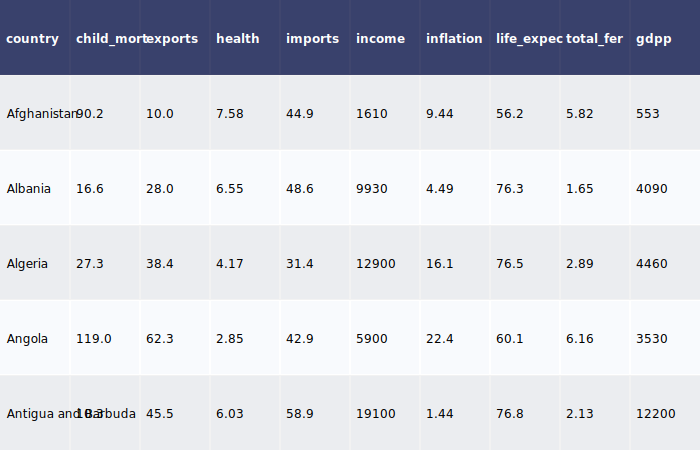

In [2]:
# Load the data
data = pd.read_csv('Country-data.csv')
iplot(ff.create_table(data.head()))

In [3]:
# Check for duplicated data
sum(data.duplicated(subset = 'country'))

0

In [4]:
data.shape

(167, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
def pca_results(good_data, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)


## Exploratory Data Analysis

In [9]:
top10_child_mort = data[['country','child_mort']].sort_values(by = 'child_mort', ascending = False).head(10)
bottom10_exports = data[['country','exports']].sort_values(by =  'exports', ascending = True).head(10)
bottom10_health = data[['country','health']].sort_values(by = 'health', ascending = True).head(10)
bottom10_imports = data[['country', 'imports']].sort_values(by = 'imports', ascending = True).head(10)
bottom10_income = data[['country','income']].sort_values(by = 'income', ascending = True).head(10)
top10_inflation = data[['country','inflation']].sort_values(by = 'inflation', ascending = False).head(10)
bottom10_life_expec = data[['country','life_expec']].sort_values(by = 'life_expec', ascending = True).head(10)
top10_fertility_rate = data[['country','total_fer']].sort_values(by = 'total_fer', ascending = False).head(10)
bottom10_gdp = data[['country', 'gdpp']].sort_values(by = 'gdpp', ascending = True).head(10)

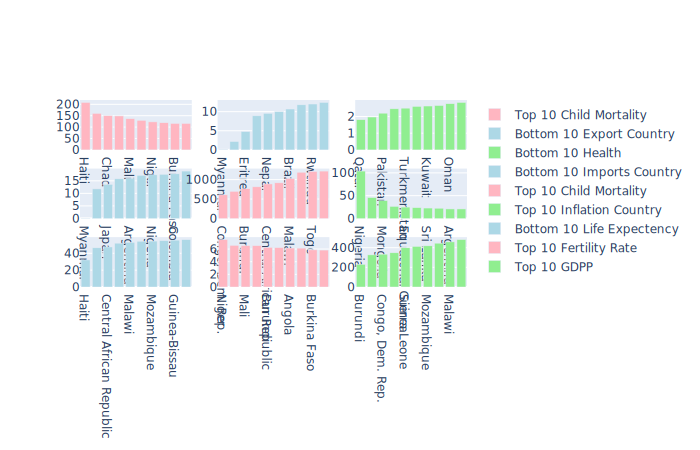

In [10]:
fig = make_subplots(rows = 3, cols = 3)

fig.add_trace(
    go.Bar(
    x = top10_child_mort['country'], y = top10_child_mort['child_mort'], marker_color='lightpink', 
        name = 'Top 10 Child Mortality'
), row = 1, col = 1)

fig.add_trace(
    go.Bar(
    x = bottom10_exports['country'], y = bottom10_exports['exports'], marker_color='lightblue', 
        name = 'Bottom 10 Export Country'
), row = 1, col = 2)

fig.add_trace(
    go.Bar(
    x = bottom10_health['country'], y = bottom10_health['health'], marker_color='lightgreen', 
        name = 'Bottom 10 Health'
), row = 1, col = 3)

fig.add_trace(
    go.Bar(
    x = bottom10_imports['country'], y = bottom10_imports['imports'], marker_color='lightblue', 
        name = 'Bottom 10 Imports Country'
), row = 2, col = 1)

fig.add_trace(
    go.Bar(
    x = bottom10_income['country'], y = bottom10_income['income'], marker_color='lightpink', 
        name = 'Top 10 Child Mortality'
), row = 2, col = 2)

fig.add_trace(
    go.Bar(
    x = top10_inflation['country'], y = top10_inflation['inflation'], marker_color='lightgreen', 
        name = 'Top 10 Inflation Country'
), row = 2, col = 3)

fig.add_trace(
    go.Bar(
    x = bottom10_life_expec['country'], y = bottom10_life_expec['life_expec'], marker_color='lightblue', 
        name = 'Bottom 10 Life Expectency'
), row = 3, col = 1)

fig.add_trace(
    go.Bar(
    x = top10_fertility_rate['country'], y = top10_fertility_rate['total_fer'], marker_color='lightpink', 
        name = 'Top 10 Fertility Rate'
), row = 3, col = 2)

fig.add_trace(
    go.Bar(
    x = bottom10_gdp['country'], y = bottom10_gdp['gdpp'], marker_color='lightgreen', 
        name = 'Top 10 GDPP'
), row = 3, col = 3)



fig['layout'].update(height = 2000, width = 980)
iplot(fig)

<AxesSubplot:>

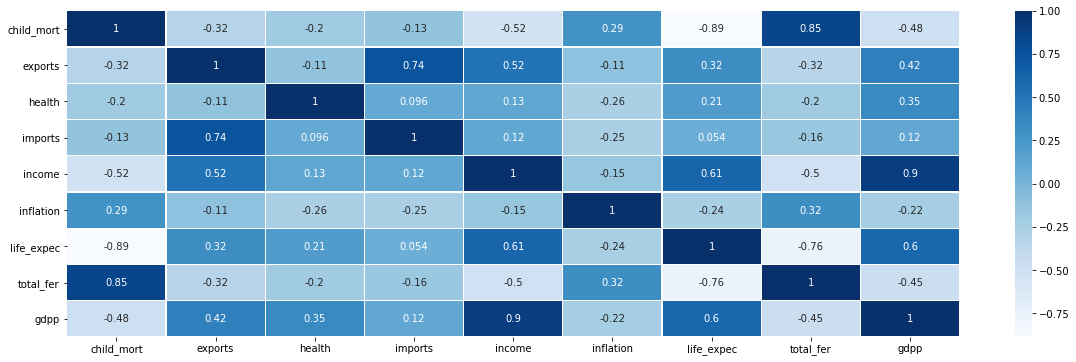

In [11]:
plt.rcParams['figure.figsize'] = (20, 6)
sns.heatmap(data.corr(), annot = True, linewidths = 0.3, cmap = 'Blues')

* total_fer & child_mort is positively correlated (0.85)
* income and gdpp is positively correlated (0.9)
* imports & exports are positivley correlated (0.74)
* child_mort & life_expec are negatively correlated (-0.89)
* total_fer & life_expec are negatively correlated (-0.76)

### Outliers

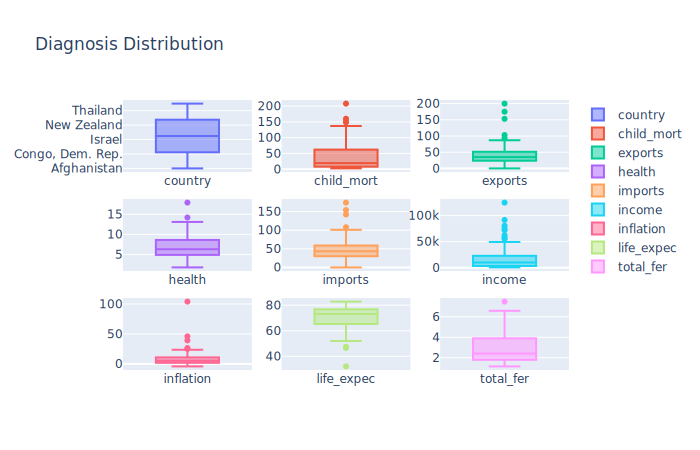

In [12]:
# Box Plot to view the outliers
fig = make_subplots( rows = 3, cols = 3)
column_names = data.columns
feature_index = 0
for row in range(3):
    for col in range(3):
        fig.add_trace(go.Box(y = data[column_names[feature_index]], name = column_names[feature_index]), 
                      row = row + 1 , col = col + 1)
        feature_index = feature_index + 1    
fig.update_layout(
    title_text = "Diagnosis Distribution",
    width =  950,
    height = 2000
)
iplot(fig)

In [13]:
log_data = data.copy()
percentiles = log_data['child_mort'].quantile([0.05,0.95]).values
log_data['child_mort'][log_data['child_mort'] <= percentiles[0]] = percentiles[0]
log_data['child_mort'][log_data['child_mort'] >= percentiles[1]] = percentiles[1]

percentiles = log_data['health'].quantile([0.05,0.95]).values
log_data['health'][log_data['health'] <= percentiles[0]] = percentiles[0]
log_data['health'][log_data['health'] >= percentiles[1]] = percentiles[1]

percentiles = log_data['life_expec'].quantile([0.05,0.95]).values
log_data['life_expec'][log_data['life_expec'] <= percentiles[0]] = percentiles[0]
log_data['life_expec'][log_data['life_expec'] >= percentiles[1]] = percentiles[1]

percentiles = log_data['total_fer'].quantile([0.05,0.95]).values
log_data['total_fer'][log_data['total_fer'] <= percentiles[0]] = percentiles[0]
log_data['total_fer'][log_data['total_fer'] >= percentiles[1]] = percentiles[1]

percentiles = log_data['income'].quantile([0.05,0.95]).values
log_data['income'][log_data['income'] <= percentiles[0]] = percentiles[0]
log_data['income'][log_data['income'] >= percentiles[1]] = percentiles[1]

percentiles = log_data['inflation'].quantile([0.05,0.95]).values
log_data['inflation'][log_data['inflation'] <= percentiles[0]] = percentiles[0]
log_data['inflation'][log_data['inflation'] >= percentiles[1]] = percentiles[1]

percentiles = log_data['gdpp'].quantile([0.05,0.95]).values
log_data['gdpp'][log_data['gdpp'] <= percentiles[0]] = percentiles[0]
log_data['gdpp'][log_data['gdpp'] >= percentiles[1]] = percentiles[1]

percentiles = log_data['imports'].quantile([0.05,0.95]).values
log_data['imports'][log_data['imports'] <= percentiles[0]] = percentiles[0]
log_data['imports'][log_data['imports'] >= percentiles[1]] = percentiles[1]

percentiles = log_data['exports'].quantile([0.05,0.95]).values
log_data['exports'][log_data['exports'] <= percentiles[0]] = percentiles[0]
log_data['exports'][log_data['exports'] >= percentiles[1]] = percentiles[1]



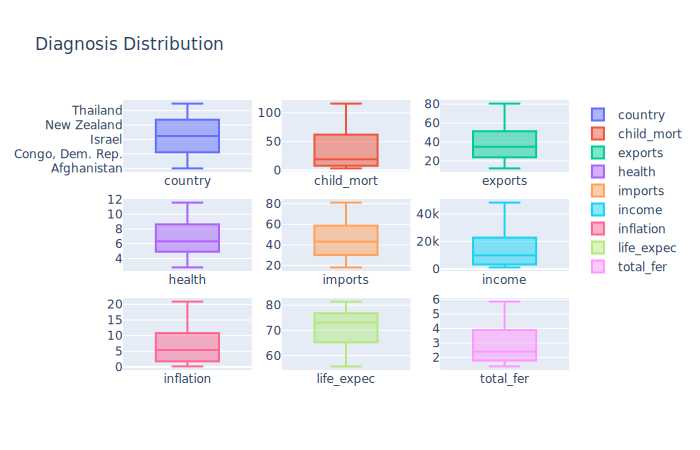

In [14]:
# Box Plot to view the outliers
fig = make_subplots( rows = 3, cols = 3)
column_names = log_data.columns
feature_index = 0
for row in range(3):
    for col in range(3):
        fig.add_trace(go.Box(y = log_data[column_names[feature_index]], name = column_names[feature_index]), 
                      row = row + 1 , col = col + 1)
        feature_index = feature_index + 1    
fig.update_layout(
    title_text = "Diagnosis Distribution",
    width =  950,
    height = 2000
)
iplot(fig)

### Feature Scaling

In [15]:
sc = StandardScaler()
columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
log_data[columns] = sc.fit_transform(log_data[columns])

### PCA 

In [16]:
pca = PCA(random_state = 42)
X = log_data.drop(['country'], axis = 'columns')
y = log_data['country']
pca.fit(X)

PCA(random_state=42)

,Explained Variance,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Dimension 1,0.4902,-0.4216,0.2322,0.1814,0.0945,0.4109,-0.2252,0.4319,-0.4067,0.3938
Dimension 2,0.1634,-0.0326,-0.5998,0.1917,-0.7300,0.1110,0.0799,0.1299,-0.0088,0.1840
Dimension 3,0.1390,-0.0943,0.2953,-0.6465,-0.2836,0.1980,0.5905,0.1130,-0.0601,0.0359
Dimension 4,0.0970,0.3879,0.2526,0.2838,0.0126,0.4198,0.1696,-0.2252,0.4466,0.4998
Dimension 5,0.0638,-0.1950,-0.0013,0.5795,0.1893,-0.1241,0.7226,0.0596,-0.1313,-0.1787
Dimension 6,0.0187,0.0785,0.5457,0.2657,-0.5256,-0.0631,-0.1521,-0.3786,-0.3637,-0.2154
Dimension 7,0.0157,0.1300,-0.3534,-0.1492,0.2496,0.2184,0.1165,-0.5664,-0.5909,0.2060
Dimension 8,0.0087,-0.7709,-0.0257,-0.0249,-0.0345,0.0952,-0.0521,-0.5128,0.3583,0.0128
Dimension 9,0.0036,0.0804,-0.1094,0.0505,0.0443,0.7261,-0.0618,0.0500,0.0664,-0.6626


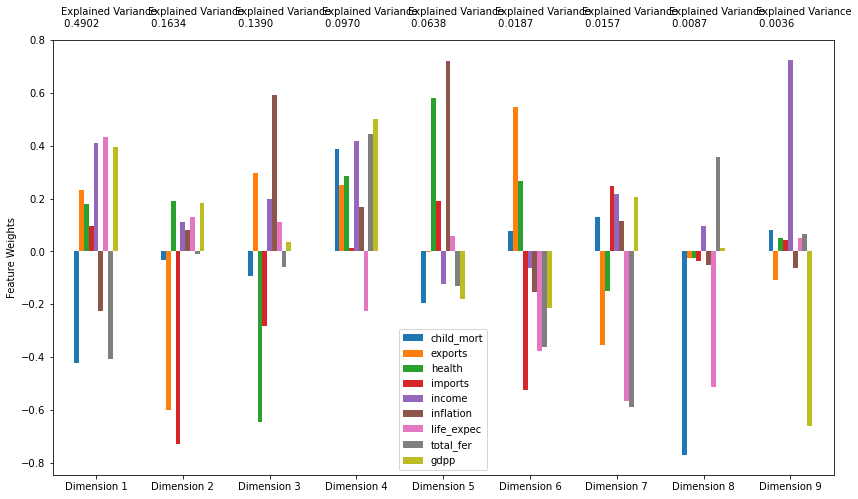

In [17]:
plt.rcParams['figure.figsize'] = (20, 12)
pca_results(X, pca)

Text(0, 0.5, 'Cumulative Explained Variance')

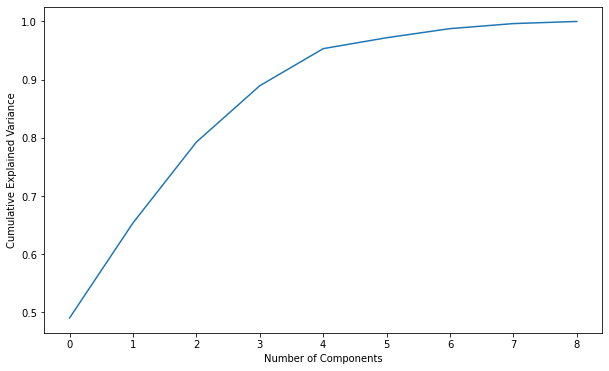

In [18]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

#### Looks like 4 components are enough to describe 95% of the variance in the dataset
#### We'll choose 4 components for our modeling

In [19]:
pca = PCA(n_components = 4)
df_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(df_pca)
df_pca.head()
df_pca.columns = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4']
df_pca.head()

,Dimension 1,Dimension 2,Dimension 3,Dimension 4
0,-3.276710,0.384825,-1.061693,0.915760
1,0.482592,0.138345,-0.315498,-1.429981
2,-0.447438,0.492021,1.777013,-0.669628
3,-3.356983,-1.158613,2.059427,1.732923
4,1.244934,-0.702870,-0.223665,-0.743702


## Modeling - KMeans

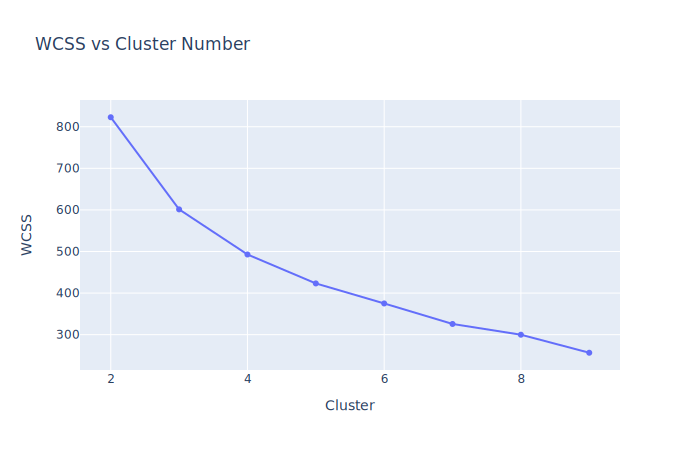

In [20]:
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
fig = go.Figure(go.Scatter(x = [2,3,4,5,6,7,8,9,10], y = wcss))
fig['layout'].update(title = 'WCSS vs Cluster Number', xaxis_title = 'Cluster', yaxis_title = 'WCSS')
iplot(fig)

In [21]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 500, n_init = 100, random_state = 0 )
identified_clusters = kmeans.fit_predict(df_pca)
data_with_clusters = df_pca.copy()
data_with_clusters['Cluster'] = identified_clusters
centers = kmeans.cluster_centers_
data_with_clusters['country'] = data['country']
data_with_clusters.head()

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Cluster,country
0,-3.276710,0.384825,-1.061693,0.915760,3,Afghanistan
1,0.482592,0.138345,-0.315498,-1.429981,4,Albania
2,-0.447438,0.492021,1.777013,-0.669628,1,Algeria
3,-3.356983,-1.158613,2.059427,1.732923,3,Angola
4,1.244934,-0.702870,-0.223665,-0.743702,4,Antigua and Barbuda


In [22]:
final_data = data_with_clusters[['country', 'Cluster']].merge(data, on = 'country')
final_data.head()

,country,Cluster,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,3,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,4,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [23]:
df = pd.concat([pd.Series(list(range(0,5))),
           final_data.groupby('Cluster')['child_mort'].mean(),
           final_data.groupby('Cluster')['exports'].mean(),
           final_data.groupby('Cluster')['health'].mean(),
           final_data.groupby('Cluster')['imports'].mean(),
           final_data.groupby('Cluster')['income'].mean(),
           final_data.groupby('Cluster')['inflation'].mean(),
           final_data.groupby('Cluster')['life_expec'].mean(),
           final_data.groupby('Cluster')['total_fer'].mean(),
           final_data.groupby('Cluster')['gdpp'].mean()], 
           axis = 1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,7.190476,86.957143,5.855238,73.461905,46014.285714,4.812000,77.861905,1.807619,31298.571429
1,1,28.321875,28.334031,5.333125,27.511434,12160.000000,13.021562,72.387500,2.447812,6005.250000
2,2,4.722727,36.018182,10.445909,34.645455,39190.909091,1.438636,80.631818,1.800000,44522.727273
3,3,93.519565,27.815435,6.433913,42.786957,3555.282609,12.114457,59.345652,5.026304,1677.173913
4,4,20.173913,44.793478,6.931087,58.200000,10478.260870,4.193674,72.336957,2.287174,5628.826087


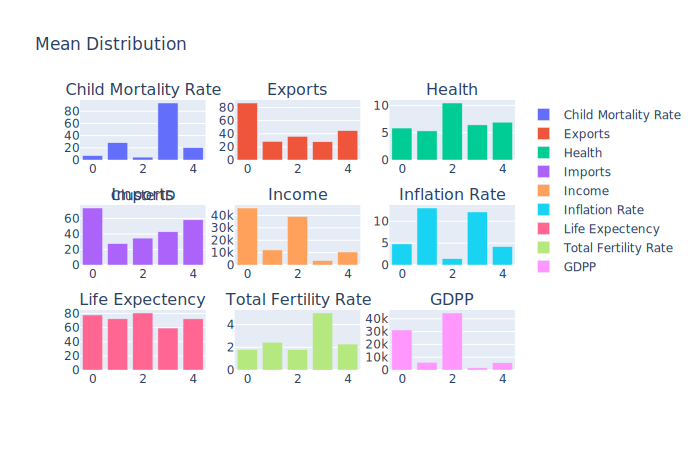

In [24]:
title = ['Child Mortality Rate','Exports','Health','Imports', 'Income','Inflation Rate','Life Expectency',  
         'Total Fertility Rate','GDPP']
index = 0
columns = df.columns

fig = make_subplots(rows = 3, cols = 3, subplot_titles=(title))
for row_index in range(1,4):
    for col_index in range(1,4):
            fig.add_trace(go.Bar(
                x = df['ClusterID'],
                y = df[columns[index+1]],
                name = title[index],
                hovertext = title[index],
                ), row = row_index, col = col_index)
            index = index + 1

fig['layout'].update(title = 'Mean Distribution', width = 980, height = 1000, xaxis_title = 'ClusterID')
iplot(fig)

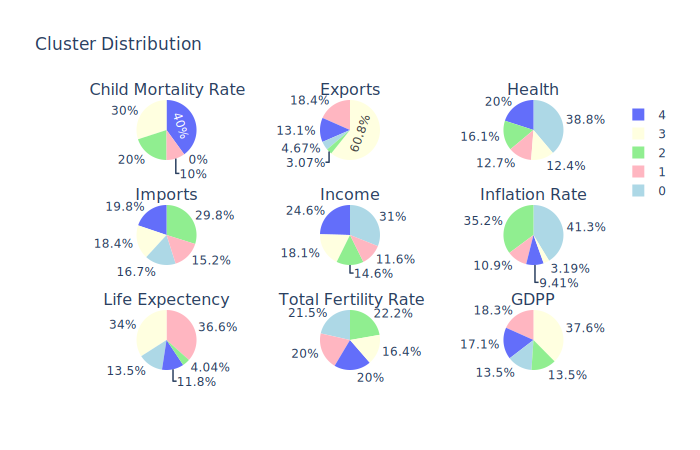

In [25]:
title = ['Child Mortality Rate','Exports','Health','Imports', 'Income','Inflation Rate','Life Expectency',  
         'Total Fertility Rate','GDPP']

columns = ['child_mort_mean', 'exports_mean', 'health_mean',
       'imports_mean', 'income_mean', 'inflation_mean', 'life_expec_mean',
       'total_fer_mean', 'gdpp_mean']
colors_pie = ['lightblue','lightpink','lightgreen','lightyellow','lightpurple']
index = 0
columns = df.columns

fig = make_subplots(rows = 3, cols = 3, subplot_titles=(title), specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}], [{"type": "pie"}, {"type": "pie"}, {"type": "pie"}], [{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])
for row_index in range(1,4):
    for col_index in range(1,4):
            fig.add_trace(go.Pie(
                values = df[columns[index]], 
               marker = dict(colors = colors_pie),
                name = title[index], 
                hovertext = title[index]), 
                row = row_index, 
                col = col_index)
            index = index + 1

fig['layout'].update(title = 'Cluster Distribution', width = 980, height = 1000)
iplot(fig)

In [26]:
final_data[final_data['Cluster'] == 1]['country'].values

array(['Algeria', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh',
       'Bolivia', 'Brazil', 'Chile', 'China', 'Colombia',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Gabon', 'Guatemala',
       'India', 'Indonesia', 'Iran', 'Jamaica', 'Kazakhstan', 'Mongolia',
       'Myanmar', 'Nepal', 'Peru', 'Philippines', 'Russia',
       'Saudi Arabia', 'Sri Lanka', 'Turkey', 'Uruguay', 'Uzbekistan',
       'Venezuela'], dtype=object)

#### Cluster with cluster ID = 1 is most backward countries. We need to focus more on these countries.
'Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Kenya', 'Lao', 'Liberia', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Sudan',
       'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'
